# Chapter 3

This chapter focuses on planewaves and their application to describing tunneling.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
import cmath as cmat

## Tunneling

This can be described as a particle traveling through a barrier.

In [2]:
a=0.01
xTotal=10
nPoints=int(xTotal/a)
energy=9
k=math.sqrt(2*energy)
def V(x):
    if x<5 and x>4: return 9
    return 0

x=np.array([])
for i in range(1,nPoints+1):
    x=np.append(x,a*i)

## The wavefunction is well defined by this behavior.

Waves can be described by Aexp(+/-ikx), where the wavefunction can also be described by the change (due to potential and energy), and the previous two points before it.

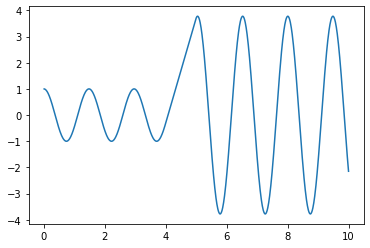

In [3]:
psi=np.array([cmat.exp(complex(0,-k*a))])
psi=np.append(psi,[(2+2*(V(x[1])-energy)*a*a)*psi[0]-1])
for i in range(2,nPoints):
    psi=np.append(psi,[(2+2*(V(x[i])-energy)*a*a)*psi[i-1]-psi[i-2]])

plt.plot(x,psi.real)
    

## Probability shows some cool, but odd behavior.

It is important to note here, that because there are imaginary terms, the psi^2 incorporates a conjugate term.  This results in the flatline behavior in certain areas.  

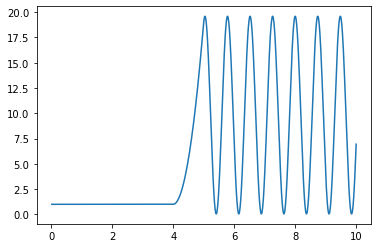

In [4]:
psiSquare=np.array([])
for i in range(nPoints):
    psiSquare=np.append(psiSquare,[psi[i].conjugate()*psi[i]])
    
plt.plot(x,psiSquare.real)

# Transmittion at Various Energies

Create a function that can do this and plot results over various energies

In [5]:
def transmition(energy):
    a=0.01
    xTotal=10
    nPoints=int(xTotal/a)
    k=math.sqrt(2*energy)
    def V(x):
        if x<5 and x>4: return 9
        return 0
    
    x=np.array([])
    for i in range(1,nPoints+1):
        x=np.append(x,a*i)
    psi=np.array([cmat.exp(complex(0,-k*a))])
    psi=np.append(psi,[(2+2*(V(x[1])-energy)*a*a)*psi[0]-1])
    for i in range(2,nPoints):
        psi=np.append(psi,[(2+2*(V(x[i])-energy)*a*a)*psi[i-1]-psi[i-2]])
        
    psiSquare=np.array([])
    for i in range(nPoints):
        psiSquare=np.append(psiSquare,[psi[i].conjugate()*psi[i]])
    
    pMin=min(psiSquare[-300:-1].real)
    pMax=max(psiSquare[-300:-1].real)
    return 2/(1+(pMin+pMax)/2)
    

### Square Pot

Interestingly, there is an osscilating behavior at the top.

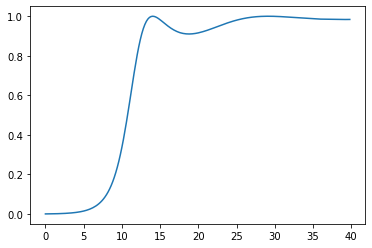

In [6]:
trans=np.array([])
energy=np.array([])
for i in range(200):
    energy=np.append(energy,[i/5])
    trans=np.append(trans,[transmition(energy[i])])
    
plt.plot(energy,trans)

### Gaussian Potential

But more realistic potentials create more realistic transparency.

In [7]:
def transmition(energy):
    a=0.01
    xTotal=10
    nPoints=int(xTotal/a)
    k=math.sqrt(2*energy)
    def V(x):
        return 9*math.exp(-((x-4.5)/0.5)**2)
    
    x=np.array([])
    for i in range(1,nPoints+1):
        x=np.append(x,a*i)
    psi=np.array([cmat.exp(complex(0,-k*a))])
    psi=np.append(psi,[(2+2*(V(x[1])-energy)*a*a)*psi[0]-1])
    for i in range(2,nPoints):
        psi=np.append(psi,[(2+2*(V(x[i])-energy)*a*a)*psi[i-1]-psi[i-2]])
        
    psiSquare=np.array([])
    for i in range(nPoints):
        psiSquare=np.append(psiSquare,[psi[i].conjugate()*psi[i]])
    
    pMin=min(psiSquare[-300:-1].real)
    pMax=max(psiSquare[-300:-1].real)
    return 2/(1+(pMin+pMax)/2)
    

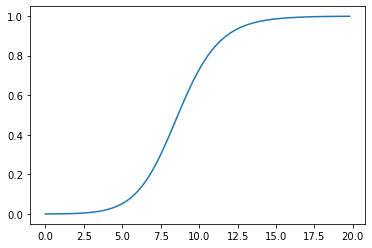

In [8]:
trans=np.array([])
energy=np.array([])
for i in range(100):
    energy=np.append(energy,[i/5])
    trans=np.append(trans,[transmition(energy[i])])
    
plt.plot(energy,trans)